In [35]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm import tqdm_notebook as tqdm
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
rcParams['font.family'] ='malgun Gothic' #AppleGothic

In [3]:
#네스프레소.csv파일 가져오기
cafe1 = pd.read_csv("homecafe.csv", encoding = 'utf-8')
cafe1['Star'] = cafe1['Star'].str.extract(r'(\d+.\d+)')
cafe1

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Star,Date,Style,Review
0,0,0,0,5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 15일,스타일: 머신 + 에어로색상: 그레이,"""Is this a good coffee maker?"" Well, that's go..."
1,1,1,1,5.0,Reviewed in the United States 🇺🇸 on 2018년 11월 28일,스타일: 기계 전용색상: 블랙,We have used this machine daily since purchase...
2,2,2,2,5.0,Reviewed in the United States 🇺🇸 on 2018년 12월 10일,스타일: 기계 전용색상: 그레이,The inside box that the machine came in had be...
3,3,3,3,5.0,Reviewed in the United States 🇺🇸 on 2022년 9월 15일,스타일: 머신 + 에어로색상: 타이탄.,I’m loving this machine! I’ve had many differe...
4,4,4,4,5.0,Reviewed in the United States 🇺🇸 on 2022년 9월 24일,스타일: 기계 전용색상: 블랙,This is the best purchase! My fiancé and I use...
...,...,...,...,...,...,...,...
2085,2085,2085,2085,5.0,Reviewed in the United States 🇺🇸 on 2018년 1월 14일,스타일: 기계 전용색상: 그레이,SO MUCH FLAVOR.
2086,2086,2086,2086,4.0,Reviewed in the United States 🇺🇸 on 2021년 12월 28일,스타일: 머신 + 에어로색상: 그레이,I've only had my Nespresso machine for a short...
2087,2087,2087,2087,5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 11일,스타일: 기계 전용색상: 레드,Nice and elegant
2088,2088,2088,2088,5.0,Reviewed in the United States 🇺🇸 on 2017년 12월 15일,스타일: 기계 전용색상: 블랙,This machine has changed the way I do mornings...


In [4]:
homecafe = cafe1['Style'].str.split("색상:", expand = True)
homecafe[0] = homecafe[0].str.replace("스타일: ", "")
homecafe.rename(columns={0: "Style", 1: "Color"}, inplace=True)
homecafe

,Style,Color
0,머신 + 에어로,그레이
1,기계 전용,블랙
2,기계 전용,그레이
3,머신 + 에어로,타이탄.
4,기계 전용,블랙
...,...,...
2085,기계 전용,그레이
2086,머신 + 에어로,그레이
2087,기계 전용,레드
2088,기계 전용,블랙


In [5]:
ymd = cafe1['Date'].str.replace("Reviewed in the United States 🇺🇸 on ", "")
ymd = ymd.str.replace("년 ", "-")
ymd = ymd.str.replace("월 ", "-")
ymd = ymd.str.replace("일", "")
ymdf = pd.to_datetime(ymd)
ymdf

0      2017-12-15
1      2018-11-28
2      2018-12-10
3      2022-09-15
4      2022-09-24
          ...    
2085   2018-01-14
2086   2021-12-28
2087   2017-12-11
2088   2017-12-15
2089   2018-11-28
Name: Date, Length: 2090, dtype: datetime64[ns]

In [6]:
homecafe['Star'] = cafe1['Star']
homecafe = homecafe[['Star','Style','Color']]
homecafe['Review'] = cafe1['Review']

In [7]:
homecafe['Date'] = ymdf
homecafe

,Star,Style,Color,Review,Date
0,5.0,머신 + 에어로,그레이,"""Is this a good coffee maker?"" Well, that's go...",2017-12-15
1,5.0,기계 전용,블랙,We have used this machine daily since purchase...,2018-11-28
2,5.0,기계 전용,그레이,The inside box that the machine came in had be...,2018-12-10
3,5.0,머신 + 에어로,타이탄.,I’m loving this machine! I’ve had many differe...,2022-09-15
4,5.0,기계 전용,블랙,This is the best purchase! My fiancé and I use...,2022-09-24
...,...,...,...,...,...
2085,5.0,기계 전용,그레이,SO MUCH FLAVOR.,2018-01-14
2086,4.0,머신 + 에어로,그레이,I've only had my Nespresso machine for a short...,2021-12-28
2087,5.0,기계 전용,레드,Nice and elegant,2017-12-11
2088,5.0,기계 전용,블랙,This machine has changed the way I do mornings...,2017-12-15


In [8]:
homecafe = homecafe[['Star','Date','Style','Color','Review']]
homecafe

,Star,Date,Style,Color,Review
0,5.0,2017-12-15,머신 + 에어로,그레이,"""Is this a good coffee maker?"" Well, that's go..."
1,5.0,2018-11-28,기계 전용,블랙,We have used this machine daily since purchase...
2,5.0,2018-12-10,기계 전용,그레이,The inside box that the machine came in had be...
3,5.0,2022-09-15,머신 + 에어로,타이탄.,I’m loving this machine! I’ve had many differe...
4,5.0,2022-09-24,기계 전용,블랙,This is the best purchase! My fiancé and I use...
...,...,...,...,...,...
2085,5.0,2018-01-14,기계 전용,그레이,SO MUCH FLAVOR.
2086,4.0,2021-12-28,머신 + 에어로,그레이,I've only had my Nespresso machine for a short...
2087,5.0,2017-12-11,기계 전용,레드,Nice and elegant
2088,5.0,2017-12-15,기계 전용,블랙,This machine has changed the way I do mornings...


In [9]:
homecafe = pd.DataFrame(homecafe)

In [10]:
homecafe = homecafe.astype({'Star':'float'})
homecafe

,Star,Date,Style,Color,Review
0,5.0,2017-12-15,머신 + 에어로,그레이,"""Is this a good coffee maker?"" Well, that's go..."
1,5.0,2018-11-28,기계 전용,블랙,We have used this machine daily since purchase...
2,5.0,2018-12-10,기계 전용,그레이,The inside box that the machine came in had be...
3,5.0,2022-09-15,머신 + 에어로,타이탄.,I’m loving this machine! I’ve had many differe...
4,5.0,2022-09-24,기계 전용,블랙,This is the best purchase! My fiancé and I use...
...,...,...,...,...,...
2085,5.0,2018-01-14,기계 전용,그레이,SO MUCH FLAVOR.
2086,4.0,2021-12-28,머신 + 에어로,그레이,I've only had my Nespresso machine for a short...
2087,5.0,2017-12-11,기계 전용,레드,Nice and elegant
2088,5.0,2017-12-15,기계 전용,블랙,This machine has changed the way I do mornings...


In [12]:
homecafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Star    2090 non-null   float64       
 1   Date    2090 non-null   datetime64[ns]
 2   Style   2090 non-null   object        
 3   Color   2090 non-null   object        
 4   Review  2083 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 81.8+ KB


In [13]:
print(homecafe.Style.unique())
print(homecafe.Color.unique())

['머신 + 에어로' '기계 전용' '기계 + 캡슐 VertuoLine' '머신 + 에어로치노' '기계 + 에어로치노 + 캡슐 세트'
 '기계 + 캡슐 세트']
[' 그레이' ' 블랙' ' 타이탄.' ' 레드' ' 잉크 블랙.' ' 매트 블랙.' ' LE 블랙 매트']


In [14]:
#옵션별 리뷰 갯수
style1 = homecafe['Style'].value_counts()
style1

기계 전용                 1192
머신 + 에어로               852
기계 + 캡슐 세트              18
기계 + 에어로치노 + 캡슐 세트      15
기계 + 캡슐 VertuoLine       8
머신 + 에어로치노               5
Name: Style, dtype: int64

In [ ]:
x = y.index
plt.bar(x,y)
plt.title('평점 별 리뷰 수')
plt.xlabel('평점')
plt.ylabel('리뷰 수').set_rotation(0)
plt.show()

In [15]:
#색상별 리뷰 갯수
color1 = homecafe['Color'].value_counts()
color1

 그레이         1106
 블랙           440
 레드           238
 타이탄.         236
 LE 블랙 매트      54
 잉크 블랙.        11
 매트 블랙.         5
Name: Color, dtype: int64

In [16]:
#별점별 리뷰 갯수
star1 = homecafe['Star'].value_counts()
star1

5.0    1250
1.0     438
4.0     142
2.0     132
3.0     128
Name: Star, dtype: int64

In [31]:
y = star1[[1.0,2.0,3.0,4.0,5.0]]
y

1.0     438
2.0     132
3.0     128
4.0     142
5.0    1250
Name: Star, dtype: int64

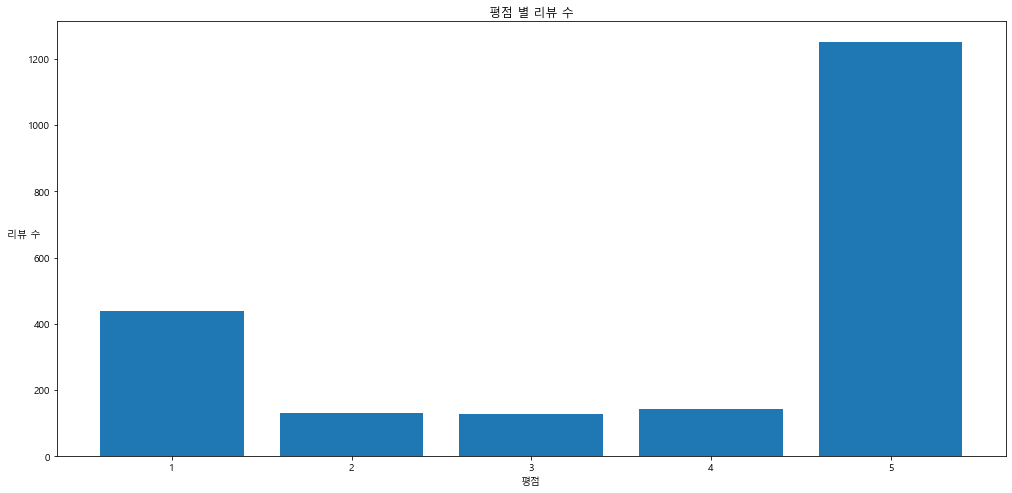

In [36]:
x = y.index
plt.bar(x,y)
plt.title('평점 별 리뷰 수')
plt.xlabel('평점')
plt.ylabel('리뷰 수').set_rotation(0)
plt.show()